In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 
import os
import calendar
import time
import glob
import gc
import scipy.stats as stats
%matplotlib inline

## DATA PREPARATION

In [66]:
my_cols_historic = ["id",
"channel", 
"seller", 
"int",
"loan",
"term",
"orig_date",
"frst_pmt_dt",
"ltv",
"comb_ltv", 
"borrwrs",
"dbt_inc_rat", 
"cr_score",
"frst_ti_buyer",
"purpose", 
"prop_type",
"units", 
"occ_type",
"p_state",
"p_zip_s", 
"pmi_pct",
"prod_type", 
"co_cr_score",
"pmi_type", 
"relocation"] 


In [67]:
historic_list_master = []


In [68]:
t = np.arange(2000,2001)
historic_list = []
log_file = open("err_log_fannie_mae_historic.log", "a")
try:
    for x in t:
        f = r"C:\Users\fxea1410\Downloads\FannieMaeDataset\Acquisition_All\Acquisition_" + str(x) + r"*.txt"
        for name in glob.glob(f):
            with open(name) as historic_content:
                for line in historic_content:
                    historic_list.append(line.rstrip('\n').strip().split("|"))
        historic_list_master.append(historic_list)
        historic_list = []
except Exception as e:
    log_file.write("error {0}\n".format(str(e)))        
       
finally:
    if not log_file.closed:
        log_file.close()  

In [69]:
df_historical1 = pd.DataFrame(data=historic_list_master[0],columns=my_cols_historic)



In [70]:
df_historical1.head()

,id,channel,seller,int,loan,term,orig_date,frst_pmt_dt,ltv,comb_ltv,...,prop_type,units,occ_type,p_state,p_zip_s,pmi_pct,prod_type,co_cr_score,pmi_type,relocation
0,100007365142,R,"JPMORGAN CHASE BANK, NA",8,75000,360,12/1999,02/2000,79,,...,SF,1,P,PA,173,,FRM,,,N
1,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000,180,01/2000,03/2000,69,,...,CO,1,P,MD,208,,FRM,,,N
2,100011322040,C,AMTRUST BANK,7.75,123000,360,11/1999,01/2000,80,,...,SF,1,P,MO,630,,FRM,,,N
3,100015192562,R,OTHER,8.5,51000,360,02/2000,04/2000,95,,...,SF,1,P,GA,316,25,FRM,,1,N
4,100015874399,C,"CITIMORTGAGE, INC.",8.75,242000,360,02/2000,04/2000,95,,...,SF,1,P,FL,335,30,FRM,,1,N


In [71]:
df_historical1.replace('', np.nan, inplace=True)

In [72]:
df_historical1.isnull().sum()

id                    0
channel               0
seller                0
int                   0
loan                  0
term                  0
orig_date             0
frst_pmt_dt           0
ltv                  10
comb_ltv         305264
borrwrs            2246
dbt_inc_rat       47022
cr_score          24168
frst_ti_buyer         0
purpose               0
prop_type             0
units                 0
occ_type              0
p_state               0
p_zip_s               0
pmi_pct          814850
prod_type             0
co_cr_score      641993
pmi_type         814850
relocation            0
dtype: int64

In [73]:
df_historical1["pmi_pct"].fillna(0,inplace=True)
df_historical1["pmi_type"].fillna(0,inplace=True)
df_historical1.isnull().sum()

id                    0
channel               0
seller                0
int                   0
loan                  0
term                  0
orig_date             0
frst_pmt_dt           0
ltv                  10
comb_ltv         305264
borrwrs            2246
dbt_inc_rat       47022
cr_score          24168
frst_ti_buyer         0
purpose               0
prop_type             0
units                 0
occ_type              0
p_state               0
p_zip_s               0
pmi_pct               0
prod_type             0
co_cr_score      641993
pmi_type              0
relocation            0
dtype: int64

In [74]:
df_historical1.dropna(inplace=True)
print("Done")

Done


In [75]:
df_historical1.isnull().sum()

id               0
channel          0
seller           0
int              0
loan             0
term             0
orig_date        0
frst_pmt_dt      0
ltv              0
comb_ltv         0
borrwrs          0
dbt_inc_rat      0
cr_score         0
frst_ti_buyer    0
purpose          0
prop_type        0
units            0
occ_type         0
p_state          0
p_zip_s          0
pmi_pct          0
prod_type        0
co_cr_score      0
pmi_type         0
relocation       0
dtype: int64

In [76]:
df_historical1= df_historical1.astype({"int":'float64',
                                        "loan":'float64',
                                        "term":'int64',
                                        "orig_date":'datetime64',
                                        "frst_pmt_dt":'datetime64',
                                        "ltv":'float64',
                                        "comb_ltv":'float64',
                                        "borrwrs":'int64',
                                        "dbt_inc_rat":'float64',
                                        "cr_score":'int64',
                                        "units":'int64',
                                        "pmi_pct":'float64',
                                        "co_cr_score":'int64'})

In [77]:
df_historical1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403877 entries, 711 to 1218589
Data columns (total 25 columns):
id               403877 non-null object
channel          403877 non-null object
seller           403877 non-null object
int              403877 non-null float64
loan             403877 non-null float64
term             403877 non-null int64
orig_date        403877 non-null datetime64[ns]
frst_pmt_dt      403877 non-null datetime64[ns]
ltv              403877 non-null float64
comb_ltv         403877 non-null float64
borrwrs          403877 non-null int64
dbt_inc_rat      403877 non-null float64
cr_score         403877 non-null int64
frst_ti_buyer    403877 non-null object
purpose          403877 non-null object
prop_type        403877 non-null object
units            403877 non-null int64
occ_type         403877 non-null object
p_state          403877 non-null object
p_zip_s          403877 non-null object
pmi_pct          403877 non-null float64
prod_type        403877 non-

In [78]:
df_historical1.loc[(df_historical1["p_state"] == "FL"), ["id"]].count()

id    23417
dtype: int64

In [79]:
df_historical1.loc[(df_historical1["p_state"] == "TX"), ["id"]].count()

id    24253
dtype: int64

In [80]:
df_historical2 = df_historical1.loc[((df_historical1["p_state"] == "TX") | (df_historical1["p_state"] == "FL")), 
                                    ["p_state",
                                    "int",
                                    "loan",
                                    "ltv",
                                    "comb_ltv",
                                    "dbt_inc_rat",
                                    "cr_score"]]
print(df_historical2.p_state.unique())

#df_historical2.head()

['TX' 'FL']


In [81]:
df_historical2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47670 entries, 1526 to 1218587
Data columns (total 7 columns):
p_state        47670 non-null object
int            47670 non-null float64
loan           47670 non-null float64
ltv            47670 non-null float64
comb_ltv       47670 non-null float64
dbt_inc_rat    47670 non-null float64
cr_score       47670 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ MB


In [82]:
df_historical2.head()

,p_state,int,loan,ltv,comb_ltv,dbt_inc_rat,cr_score
1526,TX,8.250,103000.0,80.0,90.0,20.0,694
1558,TX,7.625,220000.0,80.0,95.0,24.0,726
1660,TX,7.625,118000.0,80.0,90.0,39.0,751
4881,FL,8.625,153000.0,80.0,90.0,18.0,710
5478,FL,8.375,117000.0,80.0,90.0,41.0,736


In [83]:
df_historical2.count()

p_state        47670
int            47670
loan           47670
ltv            47670
comb_ltv       47670
dbt_inc_rat    47670
cr_score       47670
dtype: int64

In [85]:
df_jittered = df_historical2.loc[:, "int":"cr_score"]


In [86]:
df_jittered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47670 entries, 1526 to 1218587
Data columns (total 6 columns):
int            47670 non-null float64
loan           47670 non-null float64
ltv            47670 non-null float64
comb_ltv       47670 non-null float64
dbt_inc_rat    47670 non-null float64
cr_score       47670 non-null int64
dtypes: float64(5), int64(1)
memory usage: 2.5 MB


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


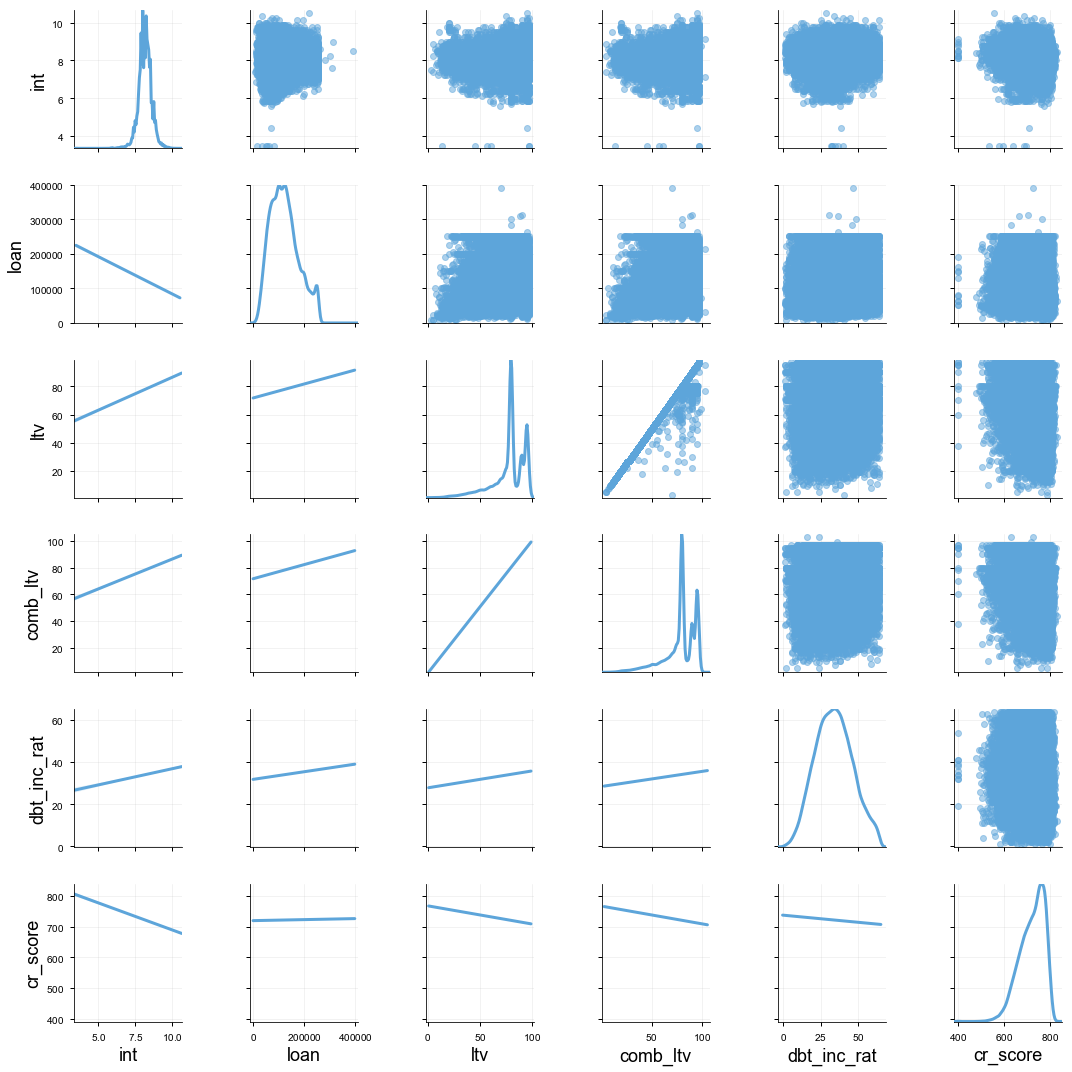

In [87]:

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [88]:
# Make the correlation matrix.
corrmat = df_historical2.corr()
print(corrmat)

                  int      loan       ltv  comb_ltv  dbt_inc_rat  cr_score
int          1.000000 -0.174635  0.133577  0.127318     0.055366 -0.145244
loan        -0.174635  1.000000  0.175264  0.185685     0.080375  0.016803
ltv          0.133577  0.175264  1.000000  0.988782     0.101301 -0.171081
comb_ltv     0.127318  0.185685  0.988782  1.000000     0.091488 -0.168529
dbt_inc_rat  0.055366  0.080375  0.101301  0.091488     1.000000 -0.105982
cr_score    -0.145244  0.016803 -0.171081 -0.168529    -0.105982  1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


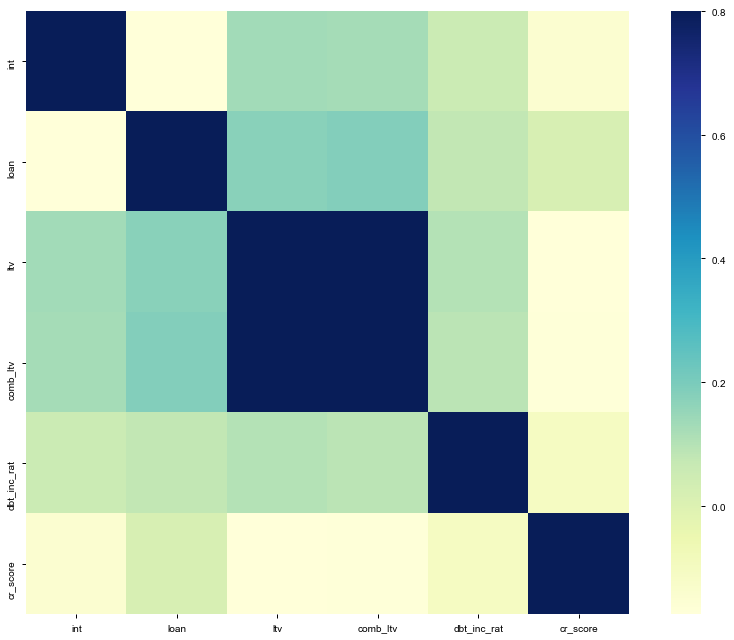

In [89]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.show()

In [90]:
# Plot all the variables with boxplots for each state.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_historical2.loc[((df_historical2["p_state"] == "TX") | (df_historical2["p_state"] == "FL")), 
                                    ["p_state",
                                    "ltv",
                                    "comb_ltv",
                                    "dbt_inc_rat"]]
df_long2 = df_historical2.loc[((df_historical2["p_state"] == "TX") | (df_historical2["p_state"] == "FL")), 
                                    ["p_state",
                                    "int"]]
df_long3 = df_historical2.loc[((df_historical2["p_state"] == "TX") | (df_historical2["p_state"] == "FL")), 
                                    ["p_state",
                                    "loan"]]
df_long4 = df_historical2.loc[((df_historical2["p_state"] == "TX") | (df_historical2["p_state"] == "FL")), 
                                    ["p_state",
                                    "cr_score"]]
print(df_long.p_state.unique())
print(df_long.head())
print(df_long2.head())
print(df_long3.head())
print(df_long4.head())


['TX' 'FL']
     p_state   ltv  comb_ltv  dbt_inc_rat
1526      TX  80.0      90.0         20.0
1558      TX  80.0      95.0         24.0
1660      TX  80.0      90.0         39.0
4881      FL  80.0      90.0         18.0
5478      FL  80.0      90.0         41.0
     p_state    int
1526      TX  8.250
1558      TX  7.625
1660      TX  7.625
4881      FL  8.625
5478      FL  8.375
     p_state      loan
1526      TX  103000.0
1558      TX  220000.0
1660      TX  118000.0
4881      FL  153000.0
5478      FL  117000.0
     p_state  cr_score
1526      TX       694
1558      TX       726
1660      TX       751
4881      FL       710
5478      FL       736


In [91]:
df_long = pd.melt(df_long, id_vars=['p_state'])
df_long2 = pd.melt(df_long2, id_vars=['p_state'])
df_long3 = pd.melt(df_long3, id_vars=['p_state'])
df_long4 = pd.melt(df_long4, id_vars=['p_state'])

print(df_long.head())
print(df_long2.head())
print(df_long3.head())
print(df_long4.head())

  p_state variable  value
0      TX      ltv   80.0
1      TX      ltv   80.0
2      TX      ltv   80.0
3      FL      ltv   80.0
4      FL      ltv   80.0
  p_state variable  value
0      TX      int  8.250
1      TX      int  7.625
2      TX      int  7.625
3      FL      int  8.625
4      FL      int  8.375
  p_state variable     value
0      TX     loan  103000.0
1      TX     loan  220000.0
2      TX     loan  118000.0
3      FL     loan  153000.0
4      FL     loan  117000.0
  p_state  variable  value
0      TX  cr_score    694
1      TX  cr_score    726
2      TX  cr_score    751
3      FL  cr_score    710
4      FL  cr_score    736


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


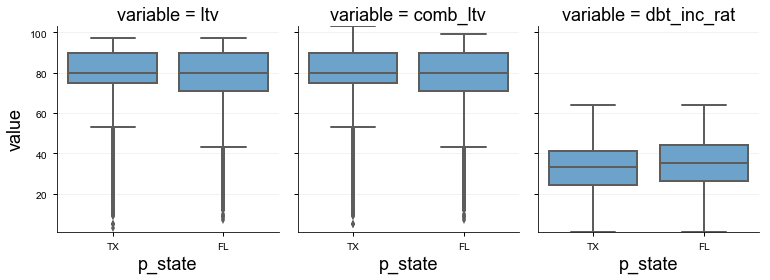

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


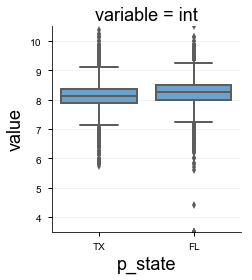

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


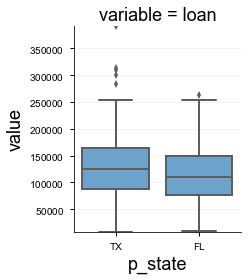

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


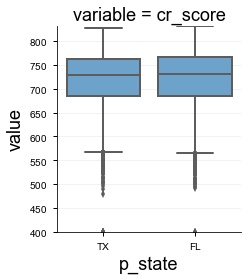

In [92]:
g = sns.FacetGrid(df_long, col="variable", height=4, aspect=.9)
g = g.map(sns.boxplot, "p_state", "value",order=["TX", "FL"])
plt.show()
g = sns.FacetGrid(df_long2, col="variable", height=4, aspect=.9)
g = g.map(sns.boxplot, "p_state", "value",order=["TX", "FL"])
plt.show()
g = sns.FacetGrid(df_long3, col="variable", height=4, aspect=.9)
g = g.map(sns.boxplot, "p_state", "value",order=["TX", "FL"])
plt.show()
g = sns.FacetGrid(df_long4, col="variable", height=4, aspect=.9)
g = g.map(sns.boxplot, "p_state", "value",order=["TX", "FL"])
plt.show()

In [93]:
# Descriptive statistics by group.
df_historical2.groupby("p_state").describe().dropna()

comb_ltv                                                     cr_score  \
           count       mean        std  min   25%   50%   75%    max    count   
p_state                                                                         
FL       23417.0  77.132767  16.516190  7.0  71.0  80.0  90.0   99.0  23417.0   
TX       24253.0  79.280089  14.594435  5.0  75.0  80.0  90.0  103.0  24253.0   

                     ...       loan                ltv                        \
               mean  ...        75%       max    count       mean        std   
p_state              ...                                                       
FL       722.641585  ...   150000.0  263000.0  23417.0  77.037537  16.499459   
TX       720.299427  ...   165000.0  391000.0  24253.0  78.704655  14.406325   

                                      
         min   25%   50%   75%   max  
p_state                               
FL       7.0  71.0  80.0  90.0  97.0  
TX       3.0  75.0  80.0  90.0  97.0  

[2 rows x 48 columns]

In [94]:
# Test whether group differences are significant.
for col in df_historical2.loc[:,"int":"cr_score"].columns:
    print(col)
    print(stats.ttest_ind(
        df_historical2[df_historical2['p_state'] == 'FL'][col].dropna(),
        df_historical2[df_historical2['p_state'] == 'TX'][col].dropna()
    ))

int
Ttest_indResult(statistic=25.933213490412367, pvalue=2.969761424929106e-147)
loan
Ttest_indResult(statistic=-25.181962812820196, pvalue=5.1411166559646984e-139)
ltv
Ttest_indResult(statistic=-11.762585120730208, pvalue=6.73521842413482e-32)
comb_ltv
Ttest_indResult(statistic=-15.055198537888293, pvalue=4.1846081435226904e-51)
dbt_inc_rat
Ttest_indResult(statistic=19.904743483731643, pvalue=8.429086936622704e-88)
cr_score
Ttest_indResult(statistic=4.758478725822519, pvalue=1.9562818124056215e-06)


In [95]:
# Add a second categorical variable.
df_2cat = df_historical1.loc[
    (((df_historical1['p_state'] == 'FL') | (df_historical1['p_state'] == 'TX')) & ((df_historical1['frst_ti_buyer'] == 'Y') | (df_historical1['frst_ti_buyer'] == 'N'))) ,
    ['p_state','frst_ti_buyer']
]
df_2cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47622 entries, 1526 to 1218587
Data columns (total 2 columns):
p_state          47622 non-null object
frst_ti_buyer    47622 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [96]:
# Create a text variable so that output is easier to interpret.
df_2cat['frst_ti_buyer_cat'] = None
df_2cat.loc[df_2cat['frst_ti_buyer'] == 'Y', 'frst_ti_buyer_cat'] = 'First Time Home Buyer'
df_2cat.loc[df_2cat['frst_ti_buyer'] == 'N', 'frst_ti_buyer_cat'] = 'Not First Time Home Buyer'
df_2cat.head()

,p_state,frst_ti_buyer,frst_ti_buyer_cat
1526,TX,Y,First Time Home Buyer
1558,TX,N,Not First Time Home Buyer
1660,TX,N,Not First Time Home Buyer
4881,FL,N,Not First Time Home Buyer
5478,FL,N,Not First Time Home Buyer


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


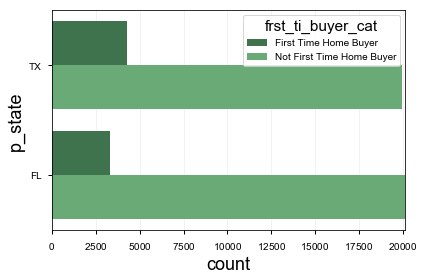

In [97]:
# Plot counts for each combination of levels.
sns.countplot(y="p_state", hue="frst_ti_buyer_cat", data=df_2cat.dropna(), palette="Greens_d",order=["TX", "FL"])
plt.show()

In [98]:
# Table of counts
counttable = pd.crosstab(df_2cat['p_state'], df_2cat['frst_ti_buyer_cat'])
print(counttable)

frst_ti_buyer_cat  First Time Home Buyer  Not First Time Home Buyer
p_state                                                            
FL                                  3284                      20125
TX                                  4254                      19959


In [99]:
# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=22283.37801856285, pvalue=0.0)


In [100]:
# Add a second categorical variable.
df_2cat2 = df_historical1.loc[
    (((df_historical1['p_state'] == 'FL') | (df_historical1['p_state'] == 'TX')) & ((df_historical1['frst_ti_buyer'] == 'Y') | (df_historical1['frst_ti_buyer'] == 'N'))) ,
    ['p_state','relocation']
]
df_2cat2.head()

,p_state,relocation
1526,TX,N
1558,TX,N
1660,TX,N
4881,FL,N
5478,FL,N


In [101]:
# Create a text variable so that output is easier to interpret.
df_2cat2['relocation_cat'] = None
df_2cat2.loc[df_2cat2['relocation'] == 'Y', 'relocation_cat'] = 'Relocation'
df_2cat2.loc[df_2cat2['relocation'] == 'N', 'relocation_cat'] = 'Not Relocation'
df_2cat2.head()

,p_state,relocation,relocation_cat
1526,TX,N,Not Relocation
1558,TX,N,Not Relocation
1660,TX,N,Not Relocation
4881,FL,N,Not Relocation
5478,FL,N,Not Relocation


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


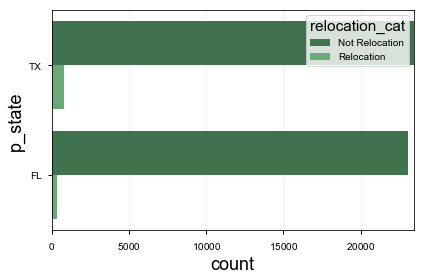

In [102]:
# Plot counts for each combination of levels.
sns.countplot(y="p_state", hue="relocation_cat", data=df_2cat2, palette="Greens_d",order=["TX", "FL"])
plt.show()

In [103]:
# Table of counts
counttable2 = pd.crosstab(df_2cat2['p_state'], df_2cat2['relocation_cat'])
print(counttable2)

relocation_cat  Not Relocation  Relocation
p_state                                   
FL                       23066         343
TX                       23435         778


In [104]:
# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable2, axis=None))

Power_divergenceResult(statistic=43257.2166645668, pvalue=0.0)


In [ ]:

#del [[df_historical1]]
#del [[df_historical2]]
#del [[df_2cat2]]
#del [[df_jittered]]
#del [[df_long]]
#del [[df_long2]]
#del [[df_long3]]
#del [[df_long4]]

#gc.collect()
#df_historical1 = pd.DataFrame()


In [ ]:
#del historic_list_master
#del historic_list
#del t
#del counttable
#del counttable2



## FEATURE ENGINEERING

In [105]:
print(df_historical1.p_state.unique())

['IN' 'MI' 'TX' 'OH' 'CA' 'TN' 'NC' 'FL' 'GA' 'SD' 'VA' 'IL' 'MD' 'OR'
 'CO' 'MO' 'RI' 'PA' 'MA' 'OK' 'DC' 'MN' 'LA' 'WA' 'WI' 'NY' 'AZ' 'DE'
 'AL' 'HI' 'ID' 'NH' 'AR' 'CT' 'NV' 'NJ' 'UT' 'KY' 'KS' 'NM' 'MS' 'ME'
 'IA' 'SC' 'PR' 'AK' 'NE' 'WV' 'MT' 'ND' 'WY' 'VT' 'VI' 'GU']


In [106]:

# Also creating a data frame to hold our features.
features = pd.get_dummies(df_historical1['p_state'])

# Deep South features.
features['Deep_South'] = np.where((df_historical1['p_state'].isin(['LA','AL','MS','GA','SC','TN','FL','TX','AR'])), 1, 0)

print(pd.crosstab(features['Deep_South'], df_historical1['p_state']))

p_state      AK    AL    AR     AZ     CA     CO    CT   DC    DE     FL ...   \
Deep_South                                                               ...    
0           557     0     0  10947  42789  14001  4322  330  1439      0 ...    
1             0  5306  3294      0      0      0     0    0     0  23417 ...    

p_state       TN     TX    UT     VA  VI   VT     WA     WI    WV   WY  
Deep_South                                                              
0              0      0  5295  10881   6  756  10763  11136  1331  840  
1           7354  24253     0      0   0    0      0      0     0    0  

[2 rows x 54 columns]


In [112]:
features['High_Interest_Rates'] = np.where(df_historical1['int']>=8, 1, 0)

# Check to make sure it worked.
print(df_historical1['int'].groupby(features['High_Interest_Rates']).describe())

                        count      mean       std   min    25%   50%    75%  \
High_Interest_Rates                                                           
0                    123918.0  7.665939  0.281290  2.99  7.625  7.75  7.875   
1                    279959.0  8.367451  0.319116  8.00  8.125  8.25  8.500   

                        max  
High_Interest_Rates          
0                     7.999  
1                    11.000  


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


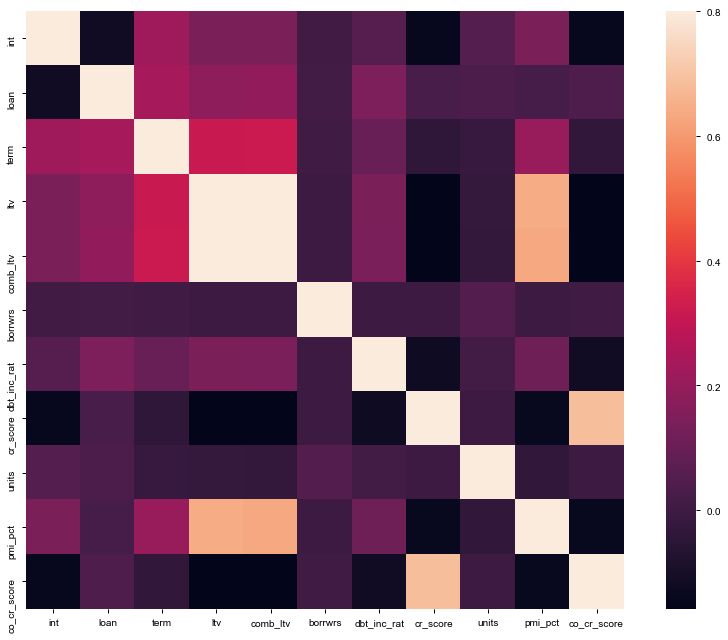

                   ltv  comb_ltv  ltv_comb_ltv
ltv           1.000000  0.992435      0.998107
comb_ltv      0.992435  1.000000      0.998107
ltv_comb_ltv  0.998107  0.998107      1.000000


In [113]:
corrmat = df_historical1.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'ltv' and 'comb_ltv' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df_historical1[['ltv','comb_ltv']].mean(axis=0)
stds = df_historical1[['ltv','comb_ltv']].std(axis=0)
features['ltv_comb_ltv'] = ((df_historical1[['ltv','comb_ltv']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df_historical1.loc[:, ['ltv','comb_ltv']]
plotdf['ltv_comb_ltv'] = features['ltv_comb_ltv'] 
corrmat2 = plotdf.corr()

print(corrmat2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


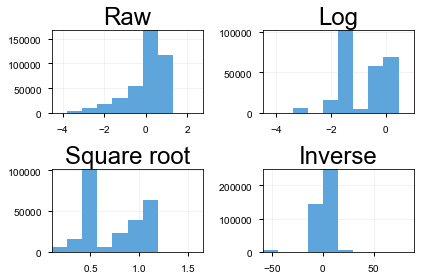

In [121]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(features['ltv_comb_ltv'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(features['ltv_comb_ltv'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(features['ltv_comb_ltv'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/features['ltv_comb_ltv'].dropna())
plt.title('Inverse')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


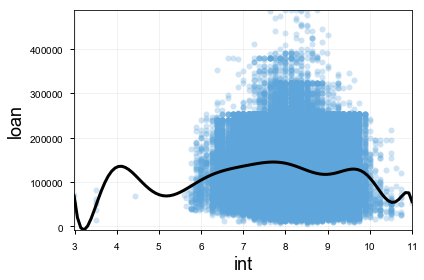

In [135]:
sns.regplot(
    df_historical1['int'],
    y=df_historical1['loan'],
    order=16,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['int_to_the_16th'] = df_historical1['int']**16

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


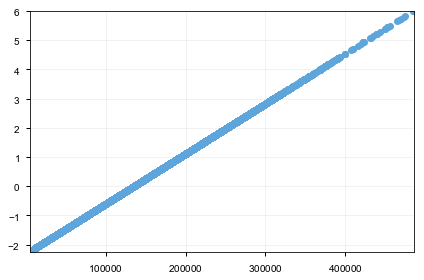

                int          loan          term           ltv      comb_ltv  \
count  4.038770e+05  4.038770e+05  4.038770e+05  4.038770e+05  4.038770e+05   
mean   1.174018e-13  1.786451e-15 -9.607761e-14 -2.397726e-14 -1.095347e-14   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.155662e+01 -2.232627e+00 -4.157191e+00 -4.527334e+00 -4.523280e+00   
25%   -6.205933e-01 -7.781352e-01  4.409122e-01 -3.757670e-01 -3.891100e-01   
50%   -6.091939e-02 -9.366833e-02  4.409122e-01  2.347576e-01  2.188562e-01   
75%    4.987545e-01  6.934685e-01  4.409122e-01  8.452821e-01  8.268224e-01   
max    6.375330e+00  5.998087e+00  4.409122e-01  1.272649e+00  4.353026e+00   

            borrwrs   dbt_inc_rat      cr_score         units       pmi_pct  \
count  4.038770e+05  4.038770e+05  4.038770e+05  4.038770e+05  4.038770e+05   
mean  -5.381794e-16 -5.317965e-15  2.628220e-16 -3.116445e-14 -2.385669e-14   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.

In [137]:
# Select only numeric variables to scale.
df_num = df_historical1.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['loan'], df_scaled['loan'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


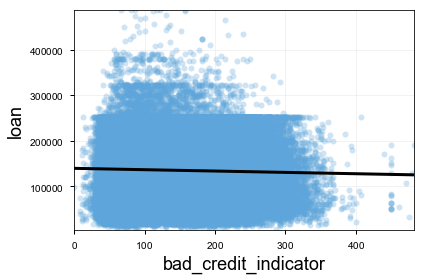

In [142]:
# Reverse-coding the 'cr_score' variable so that higher scores mean less
# credit worthiness (and thus possibly worse loan ).

features['bad_credit_indicator'] = max(df_historical1['cr_score']) - df_historical1['cr_score']

sns.regplot(
    
    features['bad_credit_indicator'],
    df_historical1['loan'],
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('bad_credit_indicator')
plt.ylabel('loan')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


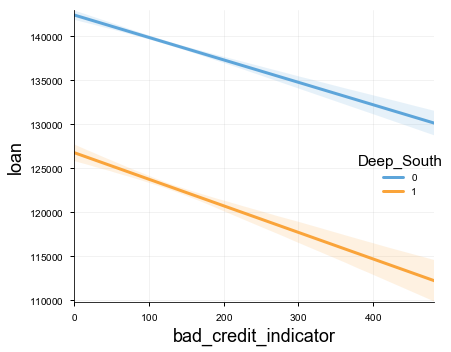

In [144]:

# Create the interaction.
features['bad_loan'] = features['bad_credit_indicator'] * features['Deep_South']

# A plot of an interaction.
# Add the 'loan' feature to the features data frame for plotting.
features['loan'] = df_historical1['loan']
sns.lmplot(
    x='bad_credit_indicator',
    y='loan',
    hue='Deep_South',
    data=features,
    scatter=False
)
plt.show()

In [147]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_jittered.dropna())

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.35866107 0.20487979 0.17061023 0.14195571]
